# Stockholms home prices prediction - New Version of Linear Regression 

In [ ]:
import pandas as pd 
import seaborn as sns

df = pd.read_csv("data/stockholm_homeprices.csv")
df.head(10)

,final_price,land_area,area,commune,price_per_area,rooms,sale_date,status
0,6950000,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,2023-05-04,Sold
1,11300000,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,2024-05-14,Sold
2,6200000,1224.0,90.0,"Segeltorp, Huddinge kommun",68889.0,6.0,2023-02-05,Available
3,12700000,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,2025-10-19,Sold
4,8100000,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,2023-03-08,Available
5,16400000,529.0,136.0,"Enskede Gård, Stockholms kommun",120588.0,9.0,2024-09-13,Available
6,4910000,688.0,140.0,"Johannesdal - Vårberg, Stockholms kommun",35071.0,6.0,2024-08-03,Available
7,7195000,588.0,114.0,"Vällingby - Råcksta Trädgårdsstad, Stockholms ...",63114.0,7.0,2024-11-28,Sold
8,6070000,1530.0,98.0,"Trollbäcken/Hanviken, Tyresö kommun",61939.0,5.0,2023-03-30,Sold
9,8500000,926.0,111.0,"Spånga Solhem, Stockholms kommun",76577.0,6.0,2023-05-11,Sold


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   final_price     500 non-null    int64  
 1   land_area       495 non-null    float64
 2   area            499 non-null    float64
 3   commune         500 non-null    object 
 4   price_per_area  499 non-null    float64
 5   rooms           490 non-null    float64
 6   sale_date       500 non-null    object 
 7   status          500 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 31.4+ KB


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['final_price'], axis=1)
X

,land_area,area,commune,price_per_area,rooms,sale_date,status
0,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,2023-05-04,Sold
1,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,2024-05-14,Sold
2,1224.0,90.0,"Segeltorp, Huddinge kommun",68889.0,6.0,2023-02-05,Available
3,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,2025-10-19,Sold
4,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,2023-03-08,Available
...,...,...,...,...,...,...,...
495,624.0,164.0,"Älvsjö/Långbro, Stockholms kommun",71707.0,8.0,2023-10-05,Sold
496,618.0,125.0,"Sätra, Stockholms kommun",58360.0,NaN,2024-07-18,Sold
497,700.0,172.0,"Skälby, Järfälla kommun",59302.0,6.0,2024-09-21,Sold
498,1307.0,174.0,"Töjnan, Sollentuna kommun",74713.0,8.0,2023-01-14,Available


In [6]:
y = df['final_price']
y

0       6950000
1      11300000
2       6200000
3      12700000
4       8100000
         ...   
495    11760000
496     7295000
497    10200000
498    13000000
499    15000000
Name: final_price, Length: 500, dtype: int64

In [7]:
# Training Data 
X_train, X_test, y_train, y_test = train_test_split(X.fillna(5), y, test_size=0.2, random_state=42) # 80% Training data - 20% Testing data
train_data = X_train.join(y_train)
train_data

,land_area,area,commune,price_per_area,rooms,sale_date,status,final_price
249,396.0,150.0,"Stora Ursvik, Sundbybergs kommun",65333.0,5.0,2024-08-29,Sold,9800000
433,575.0,67.0,"Vällingby - Råcksta, Stockholms kommun",111940.0,5.0,2024-02-26,Sold,7500000
19,980.0,157.0,"Nälsta, Stockholms kommun",47739.0,5.0,2023-07-24,Sold,7495000
322,573.0,206.0,"Ålsten, Stockholms kommun",92233.0,7.0,2024-08-22,Available,19000000
332,1262.0,127.0,"Fornudden-Persudde, Tyresö kommun",49606.0,5.0,2023-05-20,Available,6300000
...,...,...,...,...,...,...,...,...
106,665.0,136.0,"Sköndal - Kakstan, Stockholms kommun",74265.0,6.0,2023-09-03,Sold,10100000
270,1082.0,250.0,"Fornudden-Persudde, Tyresö kommun",40800.0,8.0,2024-09-05,Sold,10200000
348,1206.0,200.0,"Barkarby, Järfälla kommun",55000.0,7.0,2024-08-19,Sold,11000000
435,939.0,235.0,"Fornudden, Tyresö kommun",41277.0,7.0,2025-06-23,Available,9700000


In [8]:
X_test

,land_area,area,commune,price_per_area,rooms,sale_date,status
361,910.0,165.0,"Stortorp, Huddinge kommun",53030.0,6.0,2024-07-31,Sold
73,475.0,95.0,"Bromma Nockebyhov, Stockholms kommun",96842.0,5.0,2024-06-03,Sold
374,1100.0,144.0,"Mälarhöjden, Stockholms kommun",97222.0,7.0,2023-09-20,Sold
155,663.0,119.0,"Spånga Bromsten, Stockholms kommun",55882.0,5.0,2025-03-20,Available
104,683.0,146.0,"Vinsta, Stockholms kommun",49829.0,6.0,2023-03-23,Sold
...,...,...,...,...,...,...,...
347,562.0,101.0,"Norra Ängby, Stockholms kommun",108911.0,5.0,2025-10-05,Available
86,814.0,117.0,"Farsta, Stockholms kommun",42735.0,5.0,2025-06-27,Sold
75,265.0,157.0,"Bromma Smedslätten, Stockholms kommun",94427.0,7.0,2025-02-04,Sold
438,336.0,92.0,"Tallkrogen, Stockholms kommun",105978.0,5.0,2023-08-28,Sold


In [9]:
y_test

361     8750000
73      9200000
374    14000000
155     6650000
104     7275000
         ...   
347    11000000
86      5000000
75     14825000
438     9750000
15      6995000
Name: final_price, Length: 100, dtype: int64

array([[<Axes: title={'center': 'land_area'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'price_per_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'final_price'}>, <Axes: >]], dtype=object)

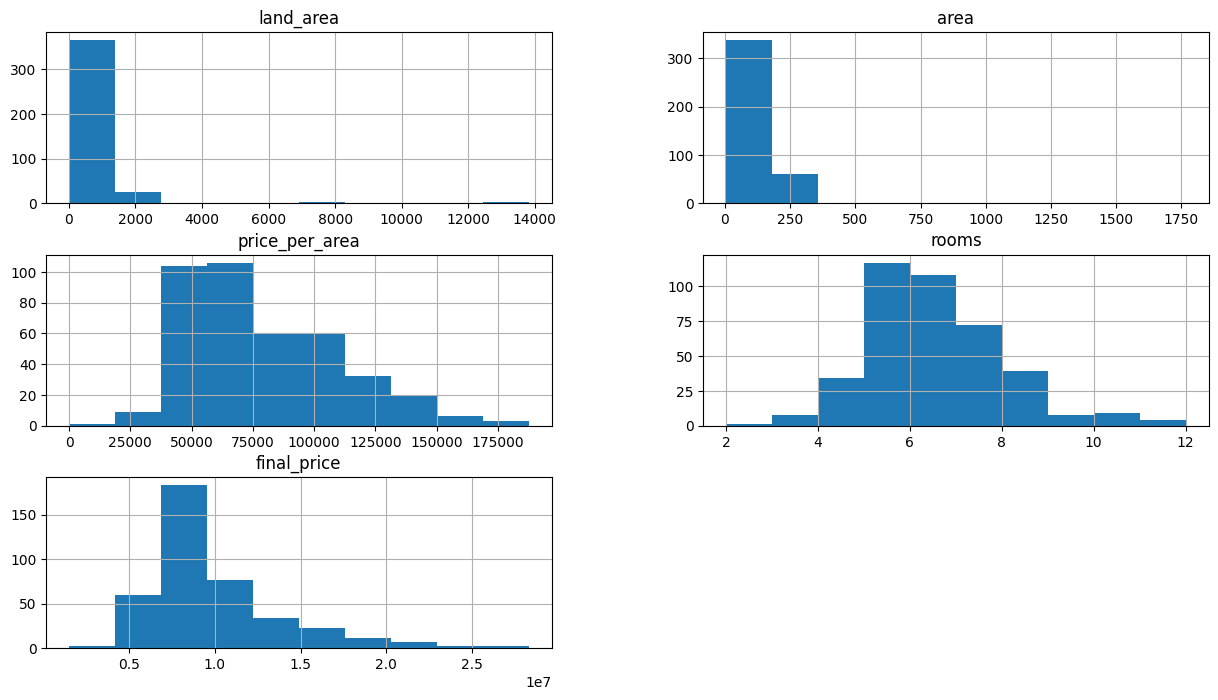

In [10]:
train_data.hist(figsize=(15,8))

# Linear Regression

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import joblib


categorical_cols = X_train.select_dtypes(include=["object"]).columns
numeric_cols = X_train.select_dtypes(include=["number"]).columns

print("Categorical columns:", list(categorical_cols))
print("Numeric columns:", list(numeric_cols))

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols), 
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols) # Converts categorical cols into binary format to ensure it can be effectively in linear regresion model
    ]                                                  
)

# Linear Regression pipeline
pipeline_lineal = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

# Train
pipeline_lineal.fit(X_train, y_train)

# Predict and evaluate
pred = pipeline_lineal.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print(f"R2 Score: {r2:.2f}%") 
print(f"MAE: {mae:.2f} SEK") 

# Save the pipeline for our predictions
#model_ml = "models/stockholm_homeprices_new.pkl"
#joblib.dump(pipeline_lineal, model_ml)
#X_test.to_csv("data/X_testing_new.csv", index=False)
#save = pd.DataFrame({"y_true": y_test, "y_pred": pred}).to_csv("data/new_predictions.csv", index=False) # Loading our predictions into a CSV-file

Categorical columns: ['commune', 'sale_date', 'status']
Numeric columns: ['land_area', 'area', 'price_per_area', 'rooms']
R2 Score: -4.91%
MAE: 5890735.19 SEK
